<a href="https://colab.research.google.com/github/NombusoP/COMPUTATIONAL-DRUG-DISCOVERY/blob/main/CADD_bioactivity_data_preprocessing_hif1_p1finale1zdg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COMPUTATIONAL DRUG DISCOVERY PROJECT P1.
#Collection and preprocessing of bioactivity data from ChEMBL database



Importing Libraries

In [ ]:
!pip install chembl_webresource_client

In [ ]:
!pip install rdkit

In [ ]:
import math
from pathlib import Path
from zipfile import ZipFile
from tempfile import TemporaryDirectory

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from chembl_webresource_client.new_client import new_client
from tqdm.auto import tqdm
from IPython.display import Image
import plotly
import plotly.express as px
import plotly.graph_objects as go


from rdkit.Chem import PandasTools
from rdkit import Chem

import IPython





In [ ]:
uniprot_id='Q16665'

PDB:1H2M 
 HIF-1 in complex with HIF-1 alpha fragment peptide 
 HIF-1 alpha in cyan colour


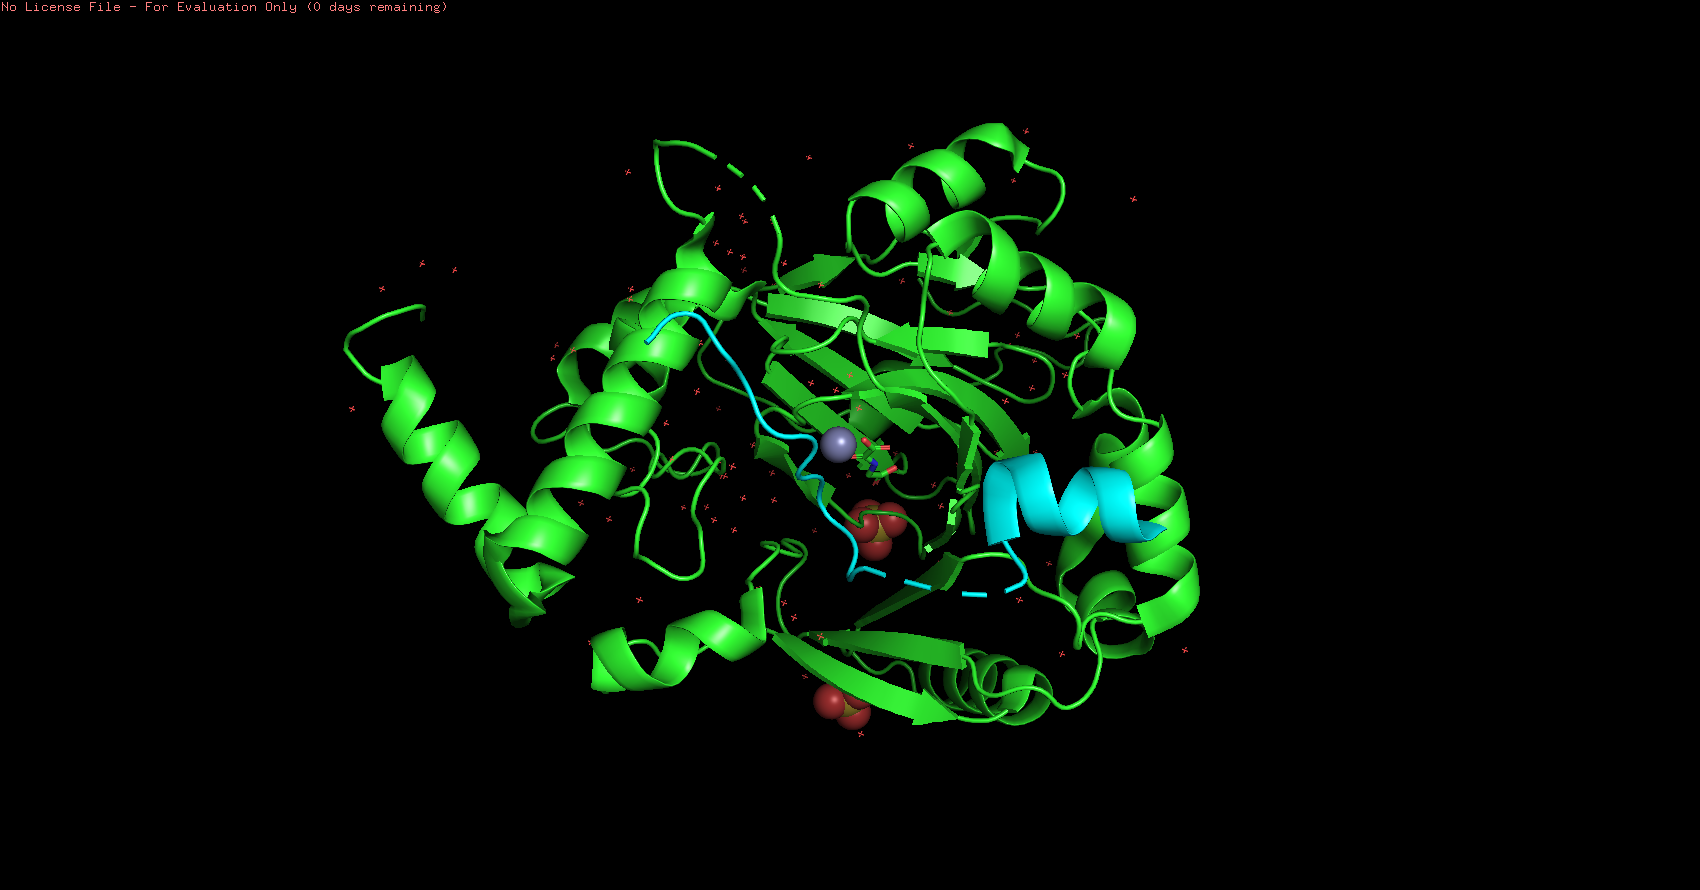

In [ ]:
from IPython.display import Image
print('PDB:1H2M','\n','HIF-1 in complex with HIF-1 alpha fragment peptide','\n','HIF-1 alpha in cyan colour')
Image(filename='1h2m.png',width=400,height=250)

api access

In [ ]:
targets_api=new_client.target
compounds_api=new_client.molecule
bioactivities_api=new_client.activity


get target data from ChEMBL,
get UniProt ID of the target

In [ ]:
targets = targets_api.get(target_components__accession=uniprot_id).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)
print(f'The type of the targets is "{type(targets)}"')

The type of the targets is "<class 'chembl_webresource_client.query_set.QuerySet'>"


search and  download Target protein data  from ChEMBL

In [ ]:
target=new_client.target
target_query=target.search(' hypoxia inducible factor')
targets=pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q9NWT6', 'xref_name': None, 'xre...",Homo sapiens,Hypoxia-inducible factor 1-alpha inhibitor,32.0,False,CHEMBL5909,"[{'accession': 'Q9NWT6', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'Q16665', 'xref_name': None, 'xre...",Homo sapiens,Hypoxia-inducible factor 1 alpha,28.0,False,CHEMBL4261,"[{'accession': 'Q16665', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'Q61221', 'xref_name': None, 'xre...",Mus musculus,Hypoxia-inducible factor 1-alpha,28.0,False,CHEMBL6046,"[{'accession': 'Q61221', 'component_descriptio...",SINGLE PROTEIN,10090
3,[],Homo sapiens,Hypoxia-inducible factor prolyl hydroxylase,24.0,False,CHEMBL3831261,"[{'accession': 'Q96KS0', 'component_descriptio...",PROTEIN FAMILY,9606
4,"[{'xref_id': 'Q9NXG6', 'xref_name': None, 'xre...",Homo sapiens,Hypoxia-inducible factor prolyl 4-hydroxylase,23.0,False,CHEMBL3047,"[{'accession': 'Q9NXG6', 'component_descriptio...",SINGLE PROTEIN,9606
...,...,...,...,...,...,...,...,...,...
1493,[],Homo sapiens,VHL/GPER1,1.0,False,CHEMBL5169075,"[{'accession': 'Q99527', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
1494,[],Homo sapiens,"3',5'-cyclic phosphodiesterase",0.0,False,CHEMBL2363066,"[{'accession': 'O76074', 'component_descriptio...",PROTEIN FAMILY,9606
1495,[],Homo sapiens,26S proteasome,0.0,False,CHEMBL2364701,"[{'accession': 'Q99460', 'component_descriptio...",PROTEIN COMPLEX,9606
1496,[],Homo sapiens,Caspase,0.0,False,CHEMBL3831289,"[{'accession': 'P49662', 'component_descriptio...",PROTEIN FAMILY,9606


Select the target (target ChEMBL ID)

In [ ]:
selected_target=targets.target_chembl_id[1]
print('Target ChEMBL ID is :',selected_target)

Target ChEMBL ID is : CHEMBL4261


In [ ]:
prefered_name=targets['pref_name'][1]
prefered_name

'Hypoxia-inducible factor 1 alpha'

 information on the selected target

In [ ]:
target=targets.iloc[1]
target

cross_references      [{'xref_id': 'Q16665', 'xref_name': None, 'xre...
organism                                                   Homo sapiens
pref_name                              Hypoxia-inducible factor 1 alpha
score                                                              28.0
species_group_flag                                                False
target_chembl_id                                             CHEMBL4261
target_components     [{'accession': 'Q16665', 'component_descriptio...
target_type                                              SINGLE PROTEIN
tax_id                                                             9606
Name: 1, dtype: object

save the selcted ChEMBL ID

In [ ]:
chembl_id=target.target_chembl_id
print('the selected ChEMBL ID is:',chembl_id)

the selected ChEMBL ID is: CHEMBL4261


OBTAIN BIOACTIVITY DATA( which is reported as IC50 values in nM)


-get bioactivity data for the target (Hypoxia-inducible factor 1 alpha)

-obtain, filter bioactivity data and it  should include the following:

-human proteins,

-bioactivity type IC50,

 -exact measurement(relation'='),

 -binding assays(assay type 'B')

In [ ]:
bioactivities = bioactivities_api.filter(
    target_chembl_id=chembl_id, type="IC50", relation="=", assay_type="B",
).only(

    "activity_id",
    "assay_chembl_id",
    "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism",
)

print(f"Length and type of bioactivities object: {len(bioactivities)}, {type(bioactivities)}")

Length and type of bioactivities object: 413, <class 'chembl_webresource_client.query_set.QuerySet'>


information on the filtered bioactivity data

In [ ]:

print(f"Length and type of first element: {len(bioactivities[1])}, {type(bioactivities[1])}")
bioactivities[1]

Length and type of first element: 13, <class 'dict'>


{'activity_id': 2007503,
 'assay_chembl_id': 'CHEMBL901549',
 'assay_description': 'Inhibition of hypoxia-induced HIF1 activation in human T47D cells after 16 hrs by cell based luciferase assay',
 'assay_type': 'B',
 'molecule_chembl_id': 'CHEMBL391152',
 'relation': '=',
 'standard_units': 'nM',
 'standard_value': '3400.0',
 'target_chembl_id': 'CHEMBL4261',
 'target_organism': 'Homo sapiens',
 'type': 'IC50',
 'units': 'uM',
 'value': '3.4'}

Download bioactivty data from ChEMBL in a pandas data frame (DF) format

In [ ]:
bioactivities_df = pd.DataFrame.from_dict(bioactivities)
print(f"DataFrame shape: {bioactivities_df.shape}")
bioactivities_df.head()

DataFrame shape: (413, 13)


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,2007500,CHEMBL901549,Inhibition of hypoxia-induced HIF1 activation ...,B,CHEMBL235553,=,nM,820.0,CHEMBL4261,Homo sapiens,IC50,uM,0.82
1,2007503,CHEMBL901549,Inhibition of hypoxia-induced HIF1 activation ...,B,CHEMBL391152,=,nM,3400.0,CHEMBL4261,Homo sapiens,IC50,uM,3.4
2,2048473,CHEMBL924308,Inhibition of hypoxia induced HIF1-alpha trans...,B,CHEMBL333985,=,nM,2000.0,CHEMBL4261,Homo sapiens,IC50,uM,2.0
3,2048474,CHEMBL924306,Inhibition of hypoxia induced HIF1-alpha trans...,B,CHEMBL399636,=,nM,1030.0,CHEMBL4261,Homo sapiens,IC50,uM,1.03
4,2048476,CHEMBL924306,Inhibition of hypoxia induced HIF1-alpha trans...,B,CHEMBL401390,=,nM,11900.0,CHEMBL4261,Homo sapiens,IC50,uM,11.9


-standard_units and units columns have the same entry

-standard_value/value columns also have the same entry,

-in this case ChEMBL standardised  column will be used , thus dropping values and units columns





checking  'units' and 'standard_units' columns whether the value measurements in these columns are the similar

In [ ]:
bioactivities_df['units'].unique()

array(['uM', 'nM', 'umol', 'nmol', 'umol/L'], dtype=object)

In [ ]:
bioactivities_df['standard_units'].unique()

array(['nM'], dtype=object)

dropping 'values' and 'units' columns

In [ ]:

bioactivities_df.drop(["units", "value"], axis=1, inplace=True)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,2007500,CHEMBL901549,Inhibition of hypoxia-induced HIF1 activation ...,B,CHEMBL235553,=,nM,820.0,CHEMBL4261,Homo sapiens,IC50
1,2007503,CHEMBL901549,Inhibition of hypoxia-induced HIF1 activation ...,B,CHEMBL391152,=,nM,3400.0,CHEMBL4261,Homo sapiens,IC50
2,2048473,CHEMBL924308,Inhibition of hypoxia induced HIF1-alpha trans...,B,CHEMBL333985,=,nM,2000.0,CHEMBL4261,Homo sapiens,IC50
3,2048474,CHEMBL924306,Inhibition of hypoxia induced HIF1-alpha trans...,B,CHEMBL399636,=,nM,1030.0,CHEMBL4261,Homo sapiens,IC50
4,2048476,CHEMBL924306,Inhibition of hypoxia induced HIF1-alpha trans...,B,CHEMBL401390,=,nM,11900.0,CHEMBL4261,Homo sapiens,IC50


also check the column 'type' which holds the IC50 data,
- check if  this bioactivity data is ONLY recorded as IC50

In [ ]:
bioactivities_df['type'].unique()

array(['IC50'], dtype=object)

PREPROCESS AND FILTER BIOACTIVITY DATA

1.convert datatype for  standard_values column from object dtype  to float dtype

-standard_value column contains standardised(IC50) values.

-to use the values for subsequent calculations and analysis ,convert values to float dtype

In [ ]:
bioactivities_df.dtypes

activity_id            int64
assay_chembl_id       object
assay_description     object
assay_type            object
molecule_chembl_id    object
relation              object
standard_units        object
standard_value        object
target_chembl_id      object
target_organism       object
type                  object
dtype: object

In [ ]:
bioactivities_df = bioactivities_df.astype({"standard_value": "float64"})
bioactivities_df.dtypes

activity_id             int64
assay_chembl_id        object
assay_description      object
assay_type             object
molecule_chembl_id     object
relation               object
standard_units         object
standard_value        float64
target_chembl_id       object
target_organism        object
type                   object
dtype: object

check whether the standard_value dtype is now a float

In [ ]:
bioactivities_df['standard_value'].dtypes

dtype('float64')

2. check and delete entries with missing values
-check all missing values reported as 'NA','',np.NaN,None

-can aslo use isnull () function for checking  any missing values


In [ ]:
missing_values=['NA','',np.NaN,None]
missing=bioactivities_df.isin(missing_values)
print(missing)

     activity_id  assay_chembl_id  assay_description  assay_type  \
0          False            False              False       False   
1          False            False              False       False   
2          False            False              False       False   
3          False            False              False       False   
4          False            False              False       False   
..           ...              ...                ...         ...   
408        False            False              False       False   
409        False            False              False       False   
410        False            False              False       False   
411        False            False              False       False   
412        False            False              False       False   

     molecule_chembl_id  relation  standard_units  standard_value  \
0                 False     False           False           False   
1                 False     False           F

code for deleting missing entries

In [ ]:
bioactivities_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (413, 11)


checking shape of DF, number of rows and columns

In [ ]:
bioactivities_df.shape

(413, 11)

In [ ]:
number_rows,number_columns=bioactivities_df.shape
print('number of rows:',number_rows,'\n','number of columns:',number_columns)

number of rows: 413 
 number of columns: 11


create heatmap to check for missing data

<Axes: >

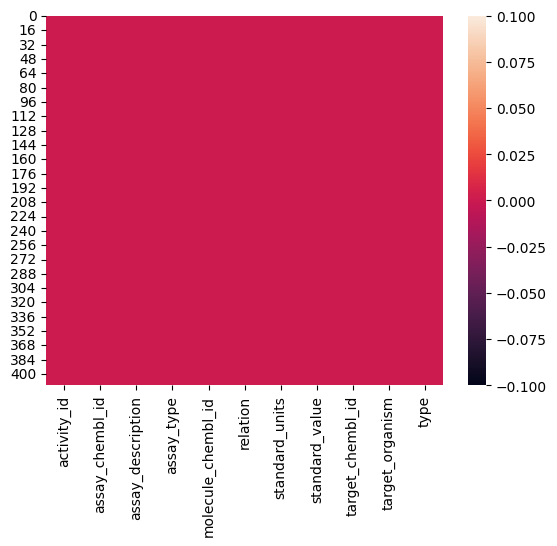

In [ ]:
sns.heatmap(bioactivities_df.isnull())

In [ ]:
bioactivities_df.isnull().sum()

activity_id           0
assay_chembl_id       0
assay_description     0
assay_type            0
molecule_chembl_id    0
relation              0
standard_units        0
standard_value        0
target_chembl_id      0
target_organism       0
type                  0
dtype: int64

3. keep entries with standard_unit=='nM' unit measurement


In [ ]:
print(f"Units in downloaded data: {bioactivities_df['standard_units'].unique()}")
print(
    f"Number of non-nM entries:\
    {bioactivities_df[bioactivities_df['standard_units'] != 'nM'].shape[0]}"
)

Units in downloaded data: ['nM']
Number of non-nM entries:    0


check if the standard_units column has only nM entries,

- check DF shape i.e number of rows and columns

In [ ]:
bioactivities_df['standard_units'].unique()

array(['nM'], dtype=object)

In [ ]:
bioactivities_df = bioactivities_df[bioactivities_df["standard_units"] == "nM"]
print(f"Units after filtering: {bioactivities_df['standard_units'].unique()}")

Units after filtering: ['nM']


In [ ]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (413, 11)


drop  duplicate entries, and keep first entries of the same molecule_chembl_id,

-check DF shape

In [ ]:
bioactivities_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (367, 11)


rename DF

In [ ]:
hif_bioactivities_df2a=bioactivities_df
hif_bioactivities_df2a.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,2007500,CHEMBL901549,Inhibition of hypoxia-induced HIF1 activation ...,B,CHEMBL235553,=,nM,820.0,CHEMBL4261,Homo sapiens,IC50
1,2007503,CHEMBL901549,Inhibition of hypoxia-induced HIF1 activation ...,B,CHEMBL391152,=,nM,3400.0,CHEMBL4261,Homo sapiens,IC50
2,2048473,CHEMBL924308,Inhibition of hypoxia induced HIF1-alpha trans...,B,CHEMBL333985,=,nM,2000.0,CHEMBL4261,Homo sapiens,IC50
3,2048474,CHEMBL924306,Inhibition of hypoxia induced HIF1-alpha trans...,B,CHEMBL399636,=,nM,1030.0,CHEMBL4261,Homo sapiens,IC50
4,2048476,CHEMBL924306,Inhibition of hypoxia induced HIF1-alpha trans...,B,CHEMBL401390,=,nM,11900.0,CHEMBL4261,Homo sapiens,IC50


checking data frame(DF) shape after dropping duplicates

In [ ]:
hif_bioactivities_df2a.shape

(367, 11)

OBTAIN COMPOUND DATA

In [ ]:
compounds_provider = compounds_api.filter(
    molecule_chembl_id__in=list(bioactivities_df["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

Download compound data from ChEMBL

In [ ]:
compounds = list(tqdm(compounds_provider))

  0%|          | 0/367 [00:00<?, ?it/s]

In [ ]:
compounds_df = pd.DataFrame.from_records(
    compounds,
)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (367, 2)


In [ ]:
compounds_df.head()

,molecule_chembl_id,molecule_structures
0,CHEMBL84,{'canonical_smiles': 'CC[C@@]1(O)C(=O)OCc2c1cc...
1,CHEMBL283631,{'canonical_smiles': 'COc1cc([C@@H]2c3cc4c(cc3...
2,CHEMBL301982,{'canonical_smiles': 'CC1=C(O)C(=O)C=C2C1=CC=C...
3,CHEMBL333985,{'canonical_smiles': 'OCc1ccc(-c2nn(Cc3ccccc3)...
4,CHEMBL354349,{'canonical_smiles': 'C[n+]1c2cc(N)ccc2cc2ccc(...


In [ ]:
compounds_df.shape

(367, 2)

Preprocessing  and filtering of the  compound data

-checking missing entries of compounds DF,

-remove missing entriess

-delete duplicates

-obtain molcules with canonical smiles only

<Axes: >

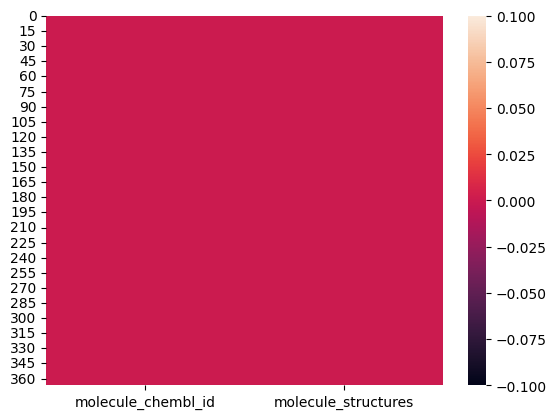

In [ ]:
#heatmap for checking missing entries
sns.heatmap(compounds_df.isnull())

1. remove any missing entries

In [ ]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (367, 2)


2. delete molecules with duplicate entries

In [ ]:
compounds_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (367, 2)


3. obtain molecules with canonical smiles

In [ ]:
compounds_df.iloc[0].molecule_structures.keys()

dict_keys(['canonical_smiles', 'molfile', 'standard_inchi', 'standard_inchi_key'])

In [ ]:
canonical_smiles = []

for i, compounds in compounds_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

compounds_df["smiles"] = canonical_smiles
compounds_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (367, 2)


all molecules without canonical smiles string  to be removed

In [ ]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (367, 2)


rechecking missing entries of the compounds DF

In [ ]:
compounds_df.isnull().sum()

molecule_chembl_id    0
smiles                0
dtype: int64

Bioactivity data and Compound data summary

In [ ]:

print(f"Bioactivities filtered: {hif_bioactivities_df2a.shape[0]}")
hif_bioactivities_df2a.columns

Bioactivities filtered: 367


Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'standard_units', 'standard_value',
       'target_chembl_id', 'target_organism', 'type'],
      dtype='object')

In [ ]:
bioactivity_column_names=hif_bioactivities_df2a.columns
print('bioactivities column summary :',"\n",bioactivity_column_names)

bioactivities column summary : 
 Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'standard_units', 'standard_value',
       'target_chembl_id', 'target_organism', 'type'],
      dtype='object')


In [ ]:
print(f"Compounds filtered: {compounds_df.shape[0]}")
compounds_df.columns

Compounds filtered: 367


Index(['molecule_chembl_id', 'smiles'], dtype='object')

In [ ]:
compound_column_names=compounds_df.columns
print('compound column  summary :','\n',compound_column_names)

compound column  summary : 
 Index(['molecule_chembl_id', 'smiles'], dtype='object')


-merge  both bioactivity and compoud DataFrame (DF)

-rename DF

In [ ]:
compounds_df.head(3)

,molecule_chembl_id,smiles
0,CHEMBL84,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C...
1,CHEMBL283631,COc1cc([C@@H]2c3cc4c(cc3[C@@H](Nc3ccc([N+](=O)...
2,CHEMBL301982,CC1=C(O)C(=O)C=C2C1=CC=C1[C@@]2(C)CC[C@@]2(C)[...


In [ ]:
hif_bioactivities_df2a.head(3)

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,2007500,CHEMBL901549,Inhibition of hypoxia-induced HIF1 activation ...,B,CHEMBL235553,=,nM,820.0,CHEMBL4261,Homo sapiens,IC50
1,2007503,CHEMBL901549,Inhibition of hypoxia-induced HIF1 activation ...,B,CHEMBL391152,=,nM,3400.0,CHEMBL4261,Homo sapiens,IC50
2,2048473,CHEMBL924308,Inhibition of hypoxia induced HIF1-alpha trans...,B,CHEMBL333985,=,nM,2000.0,CHEMBL4261,Homo sapiens,IC50


merge data frames keeping selected parameters

In [ ]:

output_df = pd.merge(
    hif_bioactivities_df2a[["molecule_chembl_id", "standard_value", "standard_units",]],
    compounds_df,
    on="molecule_chembl_id",
)

# Reset row indices
output_df.reset_index(drop=True, inplace=True)

print(f"Dataset with {output_df.shape[0]} entries.")

Dataset with 367 entries.


In [ ]:
output_df.head()

,molecule_chembl_id,standard_value,standard_units,smiles
0,CHEMBL235553,820.0,nM,CC1=C[C@@H](O)[C@@H]([C@@H](C)CC[C@@H]2[C@@H](...
1,CHEMBL391152,3400.0,nM,CC1=C[C@@H](O)[C@@H]([C@H](C)CC[C@@H]2[C@@H](C...
2,CHEMBL333985,2000.0,nM,OCc1ccc(-c2nn(Cc3ccccc3)c3ccccc23)o1
3,CHEMBL399636,1030.0,nM,COC(=O)c1ccnc(NC(=O)COc2ccc(C34CC5CC(CC(C5)C3)...
4,CHEMBL401390,11900.0,nM,NC(=O)c1cncc(NC(=O)COc2ccc(C34CC5CC(CC(C5)C3)C...


rename data frame that has been merged





In [ ]:
hif_dfx=output_df
hif_dfx.head(3)

,molecule_chembl_id,standard_value,standard_units,smiles
0,CHEMBL235553,820.0,nM,CC1=C[C@@H](O)[C@@H]([C@@H](C)CC[C@@H]2[C@@H](...
1,CHEMBL391152,3400.0,nM,CC1=C[C@@H](O)[C@@H]([C@H](C)CC[C@@H]2[C@@H](C...
2,CHEMBL333985,2000.0,nM,OCc1ccc(-c2nn(Cc3ccccc3)c3ccccc23)o1


In [ ]:
hif_dfx.shape

(367, 4)

-add  RDKit column,

-sort molecules  by  pIC50 values





In [ ]:
PandasTools.AddMoleculeColumnToFrame(hif_dfx,smilesCol='smiles')

In [ ]:
#molecules are sorted by pIC50
hif_dfx.sort_values(by='standard_value',ascending=False,inplace=True)

#reset index
hif_dfx.reset_index(drop=True,inplace=True)



,molecule_chembl_id,standard_value,standard_units,smiles,ROMol
0,CHEMBL603712,91800.0,nM,CCc1ccc(OCC(=O)Nc2cc(B3OC(C)(C)C(C)(C)O3)ccc2O...,
1,CHEMBL603103,90600.0,nM,Cc1ccc(OCC(=O)Nc2cc(B3OC(C)(C)C(C)(C)O3)ccc2O)cc1,
2,CHEMBL4573983,90400.0,nM,C[C@H]1[C@H](C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[...,
3,CHEMBL4461885,88800.0,nM,C[C@H]1[C@H](C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[...,
4,CHEMBL601646,84800.0,nM,O=C(COc1ccc(C2CCCCC2)cc1)Nc1cc(B(O)O)ccc1O,
...,...,...,...,...,...
362,CHEMBL1795435,4.2,nM,CC(C)(O)C1Cc2cc3cc(-c4ccc(O)cc4)oc3cc2O1,
363,CHEMBL2205734,3.0,nM,Cc1ccc(Cn2nc(-c3nc4ccc(-c5ccc(Cl)cc5)cc4[nH]3)...,
364,CHEMBL4538400,3.0,nM,COc1ccc([C@@H](O)[C@@H](C)Oc2ccc([C@@H]3CC[C@H...,
365,CHEMBL1795446,1.0,nM,CC(C)(O)[C@H]1Cc2cc3cc(-c4ccc(O)cc4)oc3cc2O1,

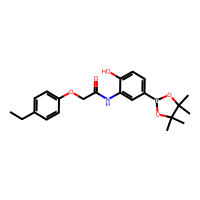
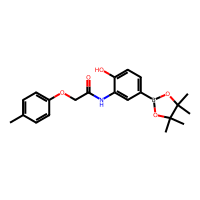
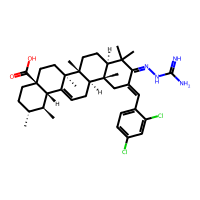
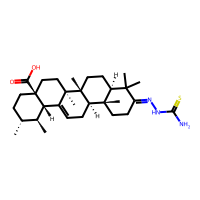
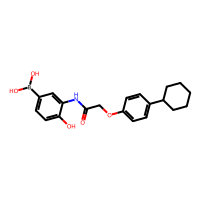
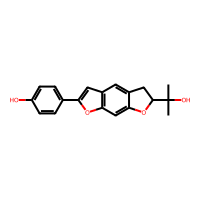
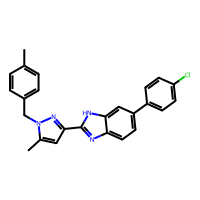
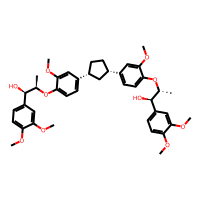
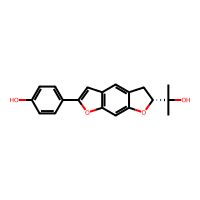
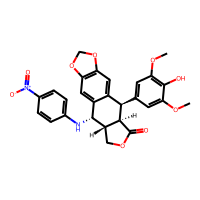

In [ ]:
hif_dfx

In [ ]:

hif_dfx.head(3)


,molecule_chembl_id,standard_value,standard_units,smiles,ROMol
0,CHEMBL603712,91800.0,nM,CCc1ccc(OCC(=O)Nc2cc(B3OC(C)(C)C(C)(C)O3)ccc2O...,<rdkit.Chem.rdchem.Mol object at 0x78e414e66ce0>
1,CHEMBL603103,90600.0,nM,Cc1ccc(OCC(=O)Nc2cc(B3OC(C)(C)C(C)(C)O3)ccc2O)cc1,<rdkit.Chem.rdchem.Mol object at 0x78e414e66c70>
2,CHEMBL4573983,90400.0,nM,C[C@H]1[C@H](C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[...,<rdkit.Chem.rdchem.Mol object at 0x78e412bed000>


save DF to csv file

In [ ]:
hif_dfx.to_csv('hifP1finale_bioactivity_data.csv',index=False)

Summary:

-bioactivity data of the target of interest ( hypoxia inducible factor 1 alpha) was collected,

-data was preprocessed, filtered  to obtain molecules that measured IC50 bioactivity values